<a href="https://colab.research.google.com/github/tuvovan/tensorflow_practice_course/blob/master/Copy_of_S%2BP_Week_2_Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%204%20-%20S%2BP/S%2BP%20Week%202%20Lesson%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


In [3]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [4]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [5]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)

print("Layer weights {}".format(l0.get_weights()))


<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float32, tf.float32)>
Layer weights [array([[-0.12121657],
       [ 0.09208181],
       [ 0.03067974],
       [ 0.02984584],
       [-0.09064917],
       [ 0.05022078],
       [ 0.01648163],
       [-0.01740488],
       [-0.01247935],
       [ 0.09432697],
       [-0.11665256],
       [-0.01472577],
       [-0.02657255],
       [ 0.09601618],
       [-0.0146366 ],
       [ 0.10967216],
       [-0.02195266],
       [ 0.18411814],
       [ 0.26709092],
       [ 0.43711546]], dtype=float32), array([0.01873093], dtype=float32)]


[[[ 62.38336 ]]

 [[ 67.94511 ]]

 [[ 66.35199 ]]

 [[ 65.75918 ]]

 [[ 62.774326]]

 [[ 64.54279 ]]

 [[ 62.259827]]

 [[ 67.18662 ]]

 [[ 65.62137 ]]

 [[ 65.75182 ]]

 [[ 61.903275]]

 [[ 68.23961 ]]

 [[ 63.893726]]

 [[ 69.64009 ]]

 [[ 64.37399 ]]

 [[ 69.92347 ]]

 [[ 62.689007]]

 [[ 64.185555]]

 [[ 60.70661 ]]

 [[ 64.34981 ]]

 [[ 60.51248 ]]

 [[ 64.72774 ]]

 [[ 60.946724]]

 [[ 63.980495]]

 [[ 65.062996]]

 [[ 71.39312 ]]

 [[ 67.98273 ]]

 [[ 65.62595 ]]

 [[ 62.66556 ]]

 [[ 67.029045]]

 [[ 61.572678]]

 [[ 63.479557]]

 [[ 56.491783]]

 [[ 61.818943]]

 [[ 62.177624]]

 [[ 63.476368]]

 [[ 64.71343 ]]

 [[ 62.879124]]

 [[ 60.22935 ]]

 [[ 60.8394  ]]

 [[ 64.58025 ]]

 [[ 69.18447 ]]

 [[ 66.0138  ]]

 [[ 65.484055]]

 [[ 63.317158]]

 [[ 64.11908 ]]

 [[ 66.27416 ]]

 [[ 68.28365 ]]

 [[ 59.000866]]

 [[ 65.16192 ]]

 [[ 67.00385 ]]

 [[ 66.71215 ]]

 [[ 63.593548]]

 [[ 66.23993 ]]

 [[ 65.9567  ]]

 [[ 61.10964 ]]

 [[ 61.988705]]

 [[ 64.8937  ]]

 [[ 64.2435  ]

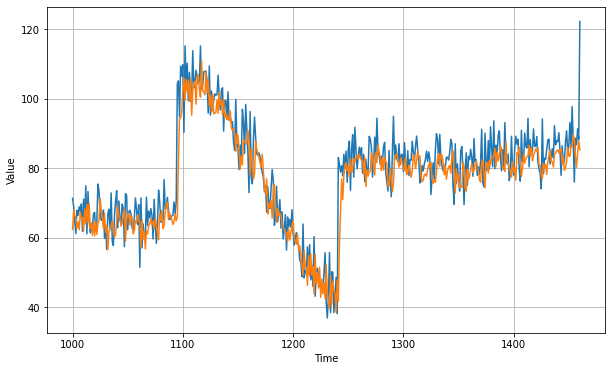

In [6]:
forecast = []

for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
print(np.array(forecast))
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [7]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.4036183